<h1>Data Analysis</h1>

---

<h2>Questions to answer:</h2>

- Is there a correlation between word count and number of favorites received by users?

- What years were most stories published?

- In what month did most stories get published?

- What character pairings were most common?

- What genres received most Favorites and most Reviews?

- Is there a correlation between Favorites and Reviews?

To start, let's upload the cleaned_data.csv file to analyze and import the necessary packages. I'll ask for a preview of the cleaned data with the head() funciton.

In [56]:
import pandas as pd
import numpy as np
from pathlib import Path

# load the clean harry data into a dataframe and preview first lines
harry_data_path = Path('cleaned_data.csv')
harry_df = pd.read_csv(harry_data_path)
harry_df.head()

,Chapters,Favs,Follows,Published,Reviews,Words,author,characters,genre,rating,synopsis,title,pairing,Month Published,Year Published
0,1,25,70,12/31/2019,6.0,"7,788",reviews,"[Hermione G., Draco M., T. Rowle] Rodolphus L.",NaN,M,All it takes is one spell for Tom Riddle to so...,Once Removed,"Hermione G., Draco M., T. Rowle",12,2019
1,1,2,1,12/31/2019,1.0,"4,178",reviews,"[Narcissa M., OC] [Cedric D., Harry P.]",Drama/Supernatural,M,God/Goddess!AU. When two gods of Olympus make ...,For the Love of Gods,"Narcissa M., OC",12,2019
2,1,71,25,12/31/2019,22.0,"3,790",reviews,"[Hermione G., Draco M.]",Romance/Angst,M,Second part to SECOND CHANCE: The decision to ...,Second Chance: New Years Eve,"Hermione G., Draco M.",12,2019
3,4,57,57,12/31/2019,14.0,"14,391",LSUSWEETIE,"[Fred W., Hermione G.]",Romance,M,Fred asks Hermione to attend a New Year's Eve ...,Only Mine Till Midnight,"Fred W., Hermione G.",12,2019
4,2,17,40,12/31/2019,13.0,"2,872",Peanutbuttertoast1,"[Hermione G., Draco M.] [Harry P., Ginny W.]",Angst/Romance,K+,Holidays are always a time for reflection...fo...,A Year In The Life,"Hermione G., Draco M.",12,2019


---

<h2>Is there a correlation between story word count and number of favorites received by users?</h2>

I'm curious to see if there's a correlation between how many favorites a story receives and how long it is. I'll do scatter plot to see if there's a correlation between 'word count' and 'favorites'. I'll try making a scatter plot to see if any clear answers come out of it.

In [34]:
#have to import matplotlib
import matplotlib.pyplot as plt


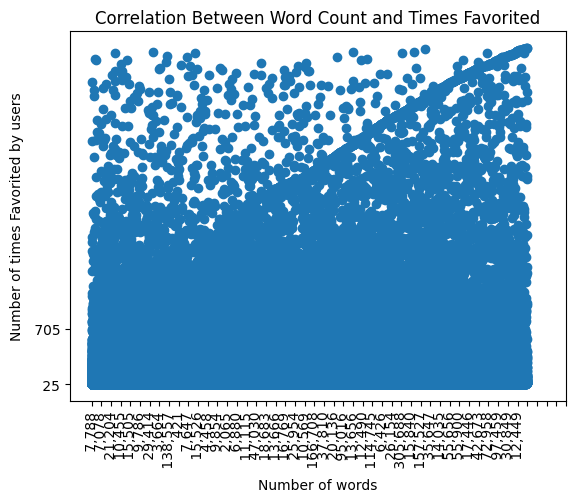

In [54]:
plt.scatter(harry_df['Words'], harry_df['Favs'])
plt.xlabel('Number of words')
plt.ylabel('Number of times Favorited by users')
plt.xticks(range(0, 50000, 1000))
plt.yticks(range(0, 1000, 500))
plt.xticks(rotation = 90)
plt.title("Correlation Between Word Count and Times Favorited")
plt.show()
plt.show()

Hmm can't tell too much from this scatter plot. Definitely not obvious if there's a correlation.

---

<h2>What years were most popular for publishing fanfic stories?</h2>

In [57]:
# Group by year and count the number of stories
stories_published_by_year = harry_df.groupby('Year Published')['title'].count()

# Sort in descending order
stories_published_by_year = stories_published_by_year.sort_values(ascending=False)

# Print the results
print(stories_published_by_year)





Year Published
2011    38575
2010    27564
2007    27364
2009    25962
2005    25114
2006    25039
2008    24945
2015     5278
2017     5158
2014     5067
2016     5016
2018     4933
2019     3662
2013     2868
2012     2160
2004     1705
Name: title, dtype: int64


Awesome! Now let's a bar graph so this is easier to read.

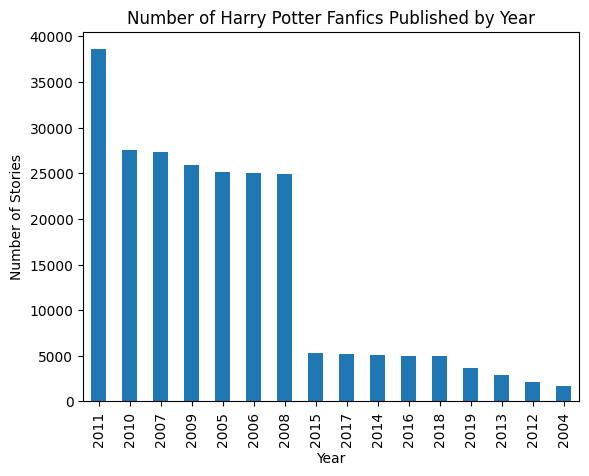

In [55]:
# Plot the number of stories published by year
stories_published_by_year.plot(kind='bar')
plt.title('Number of Harry Potter Fanfics Published by Year')
plt.xlabel('Year')
plt.ylabel('Number of Stories')
plt.show()

2011 was the year the last Harry Potter movie came out! Maybe there was a lot of fan hype at that time. 

The most five most popular years are all movie release years. It makes sense that the most popular years are all when the movies and books were still being released.

---

<h2>In what month did most stories get published?</h2>

New Harry Potter books were always published/released in the month of July. 


I wondered if there was a correlation between book releases and when fictions were published. 

In [58]:
# Group by month and count the number of stories
stories_published_by_month = harry_df.groupby('Month Published')['title'].count()

# Sort in descending order
stories_published_by_month = stories_published_by_month.sort_values(ascending=False)

# Print the results
print(stories_published_by_month)

Month Published
7     26445
8     25197
12    23041
1     20005
6     19166
9     17484
11    17226
10    17131
4     16595
5     16350
2     15991
3     15779
Name: title, dtype: int64


I'll make a bar chart so this is easy to read at a glance.

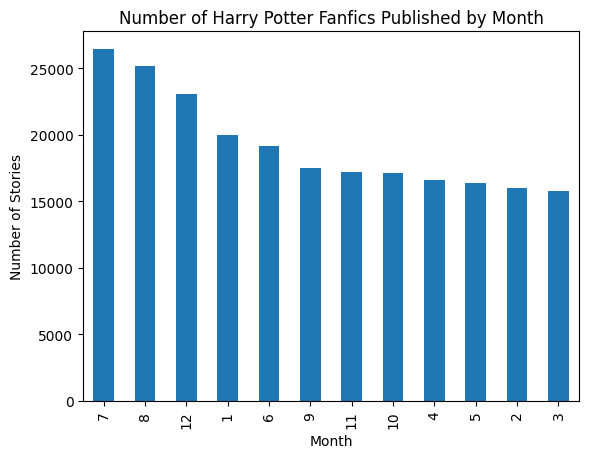

In [59]:
# Plot the number of stories published by month
stories_published_by_month.plot(kind='bar')
plt.title('Number of Harry Potter Fanfics Published by Month')
plt.xlabel('Month')
plt.ylabel('Number of Stories')
plt.show()

Super Cool!! **July is the most popular month to publish stories!** Followed by August (people still excited after reading the new release maybe?)!! 

Third most popular month is December. Maybe writers having fun, free time and Harry Potter vibes over the holidays?

In [60]:
# create a dictionary to map month numbers to names
month_names = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}

# apply the dictionary to the month published column
harry_df['Month Published'] = harry_df['Month Published'].map(month_names)